


1. 使用 Python 語言並引入 NumPy、sklearn 及 Matplotlib 套件，以進行數據生成、建模及視覺化。
2. 首先，產生300個隨機數變量 X，範圍在0到1000之間，並生成二元標籤 Y：當 X 值位於500到800之間時為1，否則為0。
3. 將數據拆分為訓練集和測試集，測試集比例為20%。
4. 使用 Logistic Regression 和 Support Vector Machine (SVM) 兩種模型進行分類預測，並基於 X 的數值大小對測試數據進行重新排序。
5. 繪製結果圖，顯示 Logistic Regression 和 SVM 的分類預測情況：
  每個圖表中，橫軸為 X 值，縱軸為標籤 y。
  

* 每個圖表中，橫軸為 X 值，縱軸為標籤 y。
* 使用不同顏色和標記符號區分真實標籤與兩種模型的預測結果。
* 使用虛線顯示 Logistic Regression 和 SVM 的決策邊界。













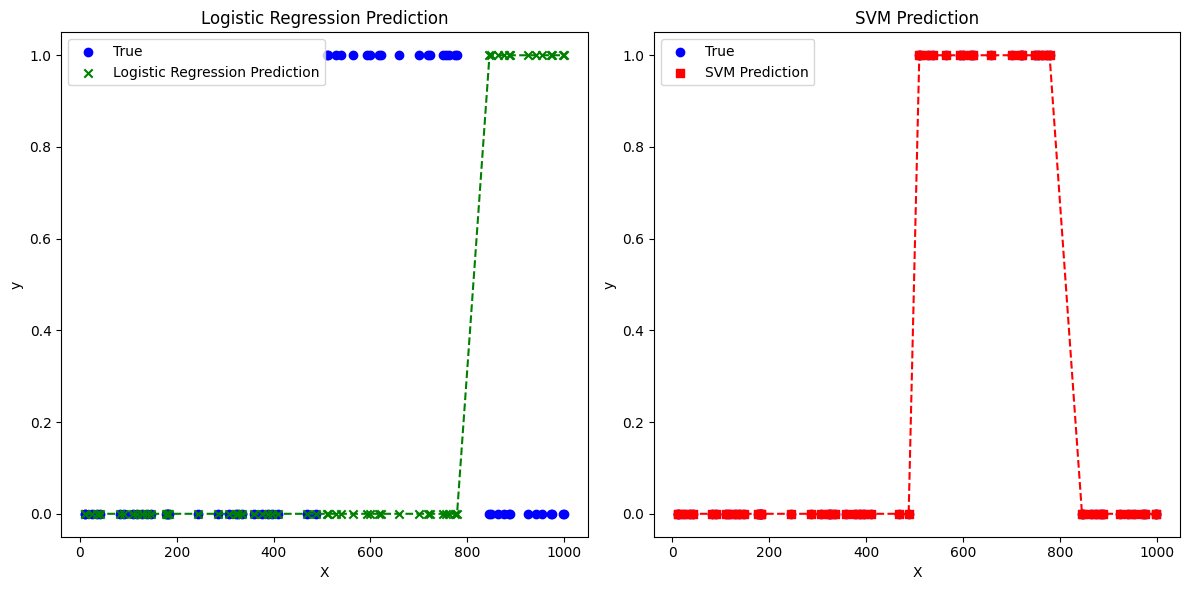

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generate 300 random variables X in the range [0, 1000]
np.random.seed(0)
X = np.random.randint(0, 1001, 300)

# Create binary classification labels Y
Y = np.where((X >= 500) & (X <= 800), 1, 0)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1, 1), Y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y1 = logreg.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, Y_train)
y2 = svm.predict(X_test)

# Reorder sequences based on the value of X
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
Y_test_sorted = Y_test[sorted_indices]
y1_sorted = y1[sorted_indices]
y2_sorted = y2[sorted_indices]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test_sorted, Y_test_sorted, color='blue', marker='o', label='True')
plt.scatter(X_test_sorted, y1_sorted, color='green', marker='x', label='Logistic Regression Prediction')
plt.plot(X_test_sorted, y1_sorted, color='green', linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Prediction')
plt.legend()

# Plot for SVM
plt.subplot(1, 2, 2)
plt.scatter(X_test_sorted, Y_test_sorted, color='blue', marker='o', label='True')
plt.scatter(X_test_sorted, y2_sorted, color='red', marker='s', label='SVM Prediction')
plt.plot(X_test_sorted, y2_sorted, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVM Prediction')
plt.legend()

plt.tight_layout()
plt.show()
